<a href="https://colab.research.google.com/github/MeiByeleth/3dpcp_book_codes/blob/master/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

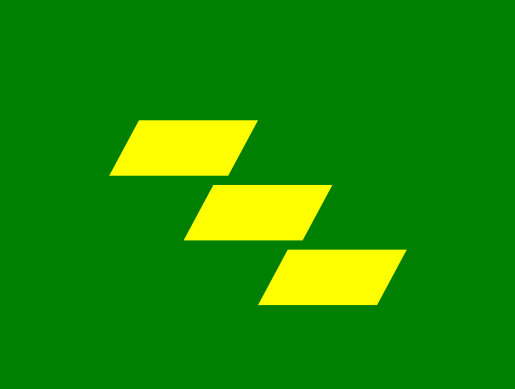

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# Create a figure and an axis
fig, ax = plt.subplots()

# Set the background color to green
fig.patch.set_facecolor('green')
ax.set_facecolor('green')

# Define the coordinates and sizes for the yellow parallelograms (connected)
shapes = [
    ((0.2, 0.7), 0.3, 0.15),
    ((0.35, 0.525), 0.3, 0.15),
    ((0.5, 0.35), 0.3, 0.15)
]

# Add the yellow parallelograms to the plot (flipped horizontally)
for (x, y), width, height in shapes:
    polygon = patches.Polygon([
        (x + width, y), (x + width * 0.2, y), (x, y - height), (x + width * 0.8, y - height)
    ], closed=True, linewidth=1, edgecolor='none', facecolor='yellow')
    ax.add_patch(polygon)

# Remove axes
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.axis('off')
plt.show()


# 講義: Pythonによる高度なデータ可視化 - エクセル分析を超えて

## 目次
1. 導入
2. なぜエクセルの分析では足りないのか？
3. Python環境のセットアップ
4. 基本的なデータ操作
5. 基本的なデータ可視化
6. 応用的なデータ可視化
7. ケーススタディ
8. まとめと質疑応答

---

## 1. 導入 (30分)
- 講義の目的と内容の説明
- 自己紹介
- 参加者の自己紹介と期待することの共有
- データ可視化の重要性について
  - データの理解とコミュニケーションのツールとしての役割
  - データ可視化の歴史と現代のツール

---

## 2. なぜエクセルの分析では足りないのか？ (20分)
- エクセルの利点と限界
  - 手軽さと利用しやすさ
  - 大規模データの処理限界
  - 複雑なデータ操作の難しさ
  - 再現性と自動化の課題
- Pythonによるデータ分析・可視化の利点
  - ライブラリの豊富さ (Pandas, Matplotlib, Seaborn, Plotlyなど)
  - 大規模データの処理能力
  - スクリプトによる再現性と自動化の容易さ

---

## 3. Python環境のセットアップ (20分)
- Pythonのインストール方法
- Jupyter Notebookのインストールと基本操作
- 必要なライブラリのインストールとインポート方法

---

## 4. 基本的なデータ操作 (30分)
- Pandasによるデータの読み込みと基本操作
  - CSV, Excel, SQLデータの読み込み
  - データフレームの基本操作 (フィルタリング、ソート、グルーピング)
- データのクリーニングと前処理
  - 欠損値の処理
  - 重複データの削除
  - データ型の変換

---

## 5. 基本的なデータ可視化 (30分)
- Matplotlibの基本
  - グラフの種類と基本的な作成方法 (折れ線グラフ、棒グラフ、ヒストグラムなど)
  - カスタマイズ方法 (軸ラベル、タイトル、凡例、色)
- Seabornの基本
  - 統計的なプロットの作成 (ヒートマップ、ペアプロット、ボックスプロットなど)
  - 美しいデフォルトスタイルとテーマの設定

---

## 休憩 (10分)

---

## 6. 応用的なデータ可視化 (40分)
- 複雑なグラフの作成
  - 多重軸プロット
  - サブプロットの作成
- インタラクティブなプロット
  - Plotlyによるインタラクティブなグラフ作成
  - Dashを使ったWebアプリケーションの紹介

---

## 7. ケーススタディ (30分)
- 実際のデータを使ったデータ可視化の事例紹介
  - データの読み込みから可視化までの一連の流れ
  - 解釈と洞察の引き出し方
  - 質疑応答とディスカッション

---

## 8. まとめと質疑応答 (20分)
- 本日の講義内容のまとめ
- 今後の学習リソースの紹介
  - 書籍、オンラインコース、コミュニティ
- 質疑応答



# なぜデータを可視化する必要があるか

A.データサイエンティストは最初にみんなやっているから。

Q.なんでやってるの？

A.機械学習のモデルに入れるときにそのまま入れられないから。
A.特徴量エンジニアリングで必須だから。

Q.なんで入れられないの？

A.業務で使うデータを機械学習のモデルに入れようとしても、データの入力のし忘れ（欠損値）や、入力ミス、外れ値があったりするから。（Netflixのデータ分析の例）を上げる

Q.なんでエクセルではなくPythonを使う必要があるの？

A.エクセルでもいい点はある。が、Pythonの方が高度な分析がしやすい。+大量のデータを扱える。
簡単にデータが見たいって話で話であれば、いちいちPython上でやったりはしない。

Q.高度な分析って何ができる？

A.データを加工して、そのまま機械学習モデルに読み込ませる、ができる

## 使うライブラリ

### pandas
パンダスと読みます。

名前の由来は宮崎県の
宮崎市フェニックス自然動物園のパンダを見て「データ分析に白黒つけたい！」的な意味合いを込めて付けられたそうです。

# 嘘です。
Pan(el)-da(ta)から由来があります。同一の標本について、複数の項目を継続的に調べて記録したデータ。超ざっくり言えば表形式のデータと理解したいただければ大丈夫。

出典：https://www.stat.go.jp/naruhodo/4_graph/data.html#:~:text=%E4%B8%80%E8%88%AC%E7%9A%84%E3%81%AB%E3%83%91%E3%83%8D%E3%83%AB%E3%83%87%E3%83%BC%E3%82%BF,%E3%81%99%E3%82%8B%E3%81%93%E3%81%A8%E3%81%8C%E3%81%A7%E3%81%8D%E3%81%BE%E3%81%99%E3%80%82

出典
Wes McKinney (2011年). “pandas: a Foundational Python Library for Data Analysis and Statistics”.
pandasの製作者。

データを読み込み＋加工します。

### matplotlib
マットプロットリブと読みます。
データをグラフなどを用いて可視化をするライブラリ。

だけども書き方はmatplotlib.pyplot。
理由は


In [ ]:
matplotlib.pyplot

### pandas
表計算を行うライブラリ。

```python
import pandas as pd
```
と呼び出す。


ちなみにimoprt文も省略してかけるが、長いのでお勧めしません。

## 実際に書いてみよう

pandasの流れは以下の通り。

1. データを読み込む
2. データを確認する
3. データを加工する（後半で解説します。）




# 1.データを読み込む

データを読み込む。表のような形式。ただし形式はxlsxではなくcsvとする。
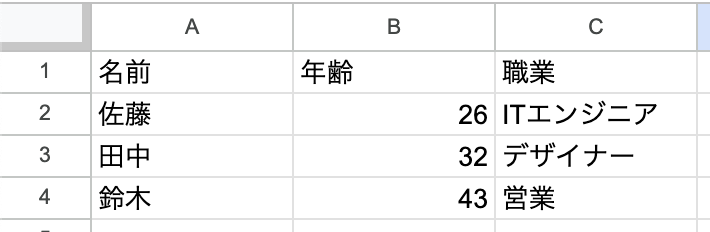


アップロードをしてから作業をしてください。

### 作業手順


アップロードしたファイルは`content`のフォルダの中に保存されます。

In [ ]:
import pandas as pd

# CSVファイルを読み込む(1.データを読み込む)
file_path = '/content/data-visualization1.csv'
df = pd.read_csv(file_path)

# データの確認(2.データを確認する)
print(df)

   名前  年齢       職業
0  佐藤  26  ITエンジニア
1  田中  32    デザイナー
2  鈴木  43       営業


## コードの解説


### ライブラリの読み込み
```python
import pandas as pd
```
pandasライブラリを読み込んでいます。

`as pd`と書くと`pd`コード上で省略してかける。
as pdと書かない場合は以下の通りになります。

```python
import pandas as pd

# CSVファイルを読み込む
file_path = '/content/data-visualization1.csv'
df = pd.read_csv(file_path)

# データの確認
print(df)
```

### 1.データの読み込み
```python
# CSVファイルを読み込む
file_path = '/content/data-visualization1.csv'
df = pd.read_csv(file_path)
```

`file_path`にはファイルがある場所とファイル名を書きます。

```python
# CSVファイルを読み込む
df = pd.read_csv('/content/data-visualization1.csv')
```
のように直接かけたりできます。
ただ、コードで何箇所も読み込んだり書き込んだりのような作業があったりすると、いちいち書き換えるのが手間なので、`file_path`に場所を書いています。


df:DataFrame、表形式のデータを効率的に扱うためのデータ構造で、行と列から成る二次元のラベル付きデータ構造です。

read_csv:pandasライブラリの関数で、CSV（Comma-Separated Values）ファイルを読み込んで DataFrame を作成するために使用。

他にも`read_excel`があります。エクセルのシートを読み取れます。




```python
print(df)
```
こちらでDataFrameを出力します。

   名前  年齢       職業
0  田中  28    エンジニア
1  鈴木  34    デザイナー
2  佐藤  22  マーケティング


## 問題
`data-visualization2.csv`をgoogle colab上にアップロードし、pandasのDataFrameに格納して、出力してください。

In [ ]:
import pandas as pd

# CSVファイルを読み込む


# データの確認
print(df)

In [ ]:
import pandas as pd

# CSVファイルを読み込む
file_path = '/content/data-visualization2.csv'
df = pd.read_csv(file_path)

# データの確認
print(df)

   名前  年齢       職業
0  斉藤  23    デザイナー
1  小川  45  ITエンジニア
2  清水  32       営業
